In [1]:
import music21
from music21.note import Note
import seaborn as sns
import matplotlib.pyplot as plt
from annotation_parser import parseAnnotation
from score_parser import parseScore
import pandas as pd
pd.set_option('display.max_rows', 6000)

In [2]:
def getAnnotationOffsets(a):
    annotationIndexes = a[a.isOnset].pitchNames.index.to_list()
    annotationNotes = a[a.isOnset].pitchNames.to_list()
    annotationText = a[a.isOnset].romanNumeral.to_list()
    annotationIndexes.append('end')
    annotationRanges = [(annotationIndexes[i], annotationIndexes[i+1], annotationNotes[i], annotationText[i]) for i in range(len(annotationNotes))]
    return annotationRanges

def getNonChordSequence(annotationRanges, s):
    ret = []
    for start, end, annotationNotes, _ in annotationRanges:
#         print(start, end)
        if end == "end":
            slices = s[start:]
        else:
            slices = s[start:end].iloc[:-1]
        originalNotes = slices.notes.to_list()
        originalNoteNames = [Note(n).name for chord in originalNotes for n in chord]
        nonChordTones = set(originalNoteNames) - set(annotationNotes)
        missingNotes = set(annotationNotes) - set(originalNoteNames)
        originalNonChord = [n for n in originalNoteNames if n in nonChordTones]
        if not originalNotes:
            missingNotesFactor = 1.0
            nonChordToneFactor = 1.0
        else:
            missingNotesRatio = len(missingNotes) / len(set(annotationNotes))
            nonChordToneRatio = len(originalNonChord) / len(originalNoteNames)
#         print('original notes:', originalNoteNames)
#         print('notes implied by annotation:', annotationNotes)
#         print('potential non-chord tones:', originalNonChord)
#         print('missing notes from annotation:', missingNotesFactor)
#         print(start, end, annotationNotes, nonChordToneFactor)
        ret.append((originalNoteNames, nonChordToneRatio, missingNotesRatio))
    return ret

In [3]:
aPath = "When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op007/1/analysis.txt"
sPath = "functional-harmony-micchi/data/BPS/scores/bps_04_01.mxl"

In [4]:
# aScore = music21.converter.parse(aPath, format="romantext").show("musicxml")
# sScore = music21.converter.parse(sPath).show("musicxml")

In [5]:
a = parseAnnotation(aPath)
s = parseScore(sPath)
annotationRanges = getAnnotationOffsets(a)
scoreMetrics = getNonChordSequence(annotationRanges, s)

In [6]:
qualitydfdict = {
    "start": [],
    "end": [],
    "romanNumeral": [],
    "annotationPitchNames": [],
    "scorePitchNames": [],
    "nonChordRatio": [],
    "missingNotesRatio": []
}

for i in range(len(annotationRanges)):
    start, end, annotationPitchNames, romanNumeral = annotationRanges[i]
    scorePitchNames, nonChordRatio, missingNotesRatio = scoreMetrics[i]
    qualitydfdict["start"].append(start)
    qualitydfdict["end"].append(end)
    qualitydfdict["romanNumeral"].append(romanNumeral)
    qualitydfdict["annotationPitchNames"].append(annotationPitchNames)
    qualitydfdict["scorePitchNames"].append(scorePitchNames)
    qualitydfdict["nonChordRatio"].append(nonChordRatio)
    qualitydfdict["missingNotesRatio"].append(missingNotesRatio)

In [7]:
qualitydf = pd.DataFrame(qualitydfdict)

In [8]:
qualitydf

,start,end,romanNumeral,annotationPitchNames,scorePitchNames,nonChordRatio,missingNotesRatio
0,0.0,3.0,I,"(E-, G, B-)","[E-, B-, E-, G, E-, B-, E-, G, E-, B-, E-, G, ...",0.000000,0.000000
1,3.0,6.0,I,"(E-, G, B-)","[E-, G, B-, E-, E-, G, B-, E-, E-, G, B-, E-, ...",0.000000,0.000000
2,6.0,9.0,I,"(E-, G, B-)","[E-, B-, E-, G, B-, E-, B-, E-, G, B-, E-, B-,...",0.000000,0.000000
3,9.0,12.0,I,"(E-, G, B-)","[E-, G, B-, E-, G, E-, G, B-, E-, G, E-, G, B-...",0.000000,0.000000
4,12.0,13.5,I,"(E-, G, B-)","[E-, G, E-, E-, E-, G, E-, E-, E-, G, E-, D, E...",0.166667,0.333333
5,13.5,15.0,ii7,"(F, A-, C, E-)","[F, A-, E-, E-, F, A-, E-, E-, F, A-, E-, D, F...",0.083333,0.250000
6,15.0,18.0,I,"(G, B-, E-)","[G, B-, E-, E-, G, B-, E-, E-, G, B-, E-, D, G...",0.333333,0.000000
7,18.0,19.5,V7,"(B-, D, F, A-)","[B-, D, B-, A-, B-, D, B-, A-, B-, D, B-, G, B...",0.083333,0.250000
8,19.5,21.0,vi7,"(C, E-, G, B-)","[C, E-, B-, A-, C, E-, B-, A-, C, E-, B-, G, C...",0.083333,0.000000
9,21.0,24.0,V7,"(D, F, A-, B-)","[D, F, B-, A-, D, F, B-, A-, D, F, B-, G, D, F...",0.166667,0.000000


68.88445754803071 73.25 96.21898269158608
Top problematic annotations:


,start,end,romanNumeral,annotationPitchNames,scorePitchNames,nonChordRatio,missingNotesRatio,score
112,234.0,237.0,viio7/vi,"(G#, B, D, F)","[F#, C, F#, F, F, F#, C, F#, F, F, F#, C, F#, ...",0.95,0.75,2.89
113,237.0,240.0,viio7/vi,"(G#, B, D, F)","[F#, C, F#, E-, A, C, E-, F#, C, F#, E-, A, C,...",1.00,1.00,4.00
216,469.0,471.0,viio/ii,"(F#, A, C)","[A-, A-, A-, A-, A-, A-, A-, A-, A-, A-, A-, A...",1.00,1.00,4.00
228,489.0,490.0,V,"(D, F#, A)","[E-, E-, E-, E-, E-, E-, E-, E-, E-, E-, E-, E-]",1.00,1.00,4.00
362,774.0,777.0,viio7/vi,"(C#, E, G, B-)","[B, F, B, B-, B-, B, F, B, B-, B-, B, F, B, A-...",0.95,0.75,2.89
363,777.0,780.0,viio7/vi,"(C#, E, G, B-)","[B, F, B, A-, D, F, A-, B, F, B, A-, D, F, A-,...",1.00,1.00,4.00
414,897.0,898.5,viio7/IV,"(G, B-, D-, F-)","[E-, G, E-, F-, E-, G, E-, F-, E-, G, E-, F-]",0.50,0.50,1.00
418,903.0,904.5,viio7/IV,"(G, B-, D-, F-)","[E-, G, E-, F-, E-, G, E-, F-, E-, G, E-, F-]",0.50,0.50,1.00
484,1029.0,1032.0,V7,"(B-, D, F, A-)","[F, F, F, F, C-, C-, C-, C-, C-, C-, A-, A-]",0.50,0.50,1.00
485,1032.0,1035.0,V7,"(B-, D, F, A-)","[F, F, F, F, C-, C-, C-, C-, C-, C-, B-, B-]",0.50,0.50,1.00


<AxesSubplot:>

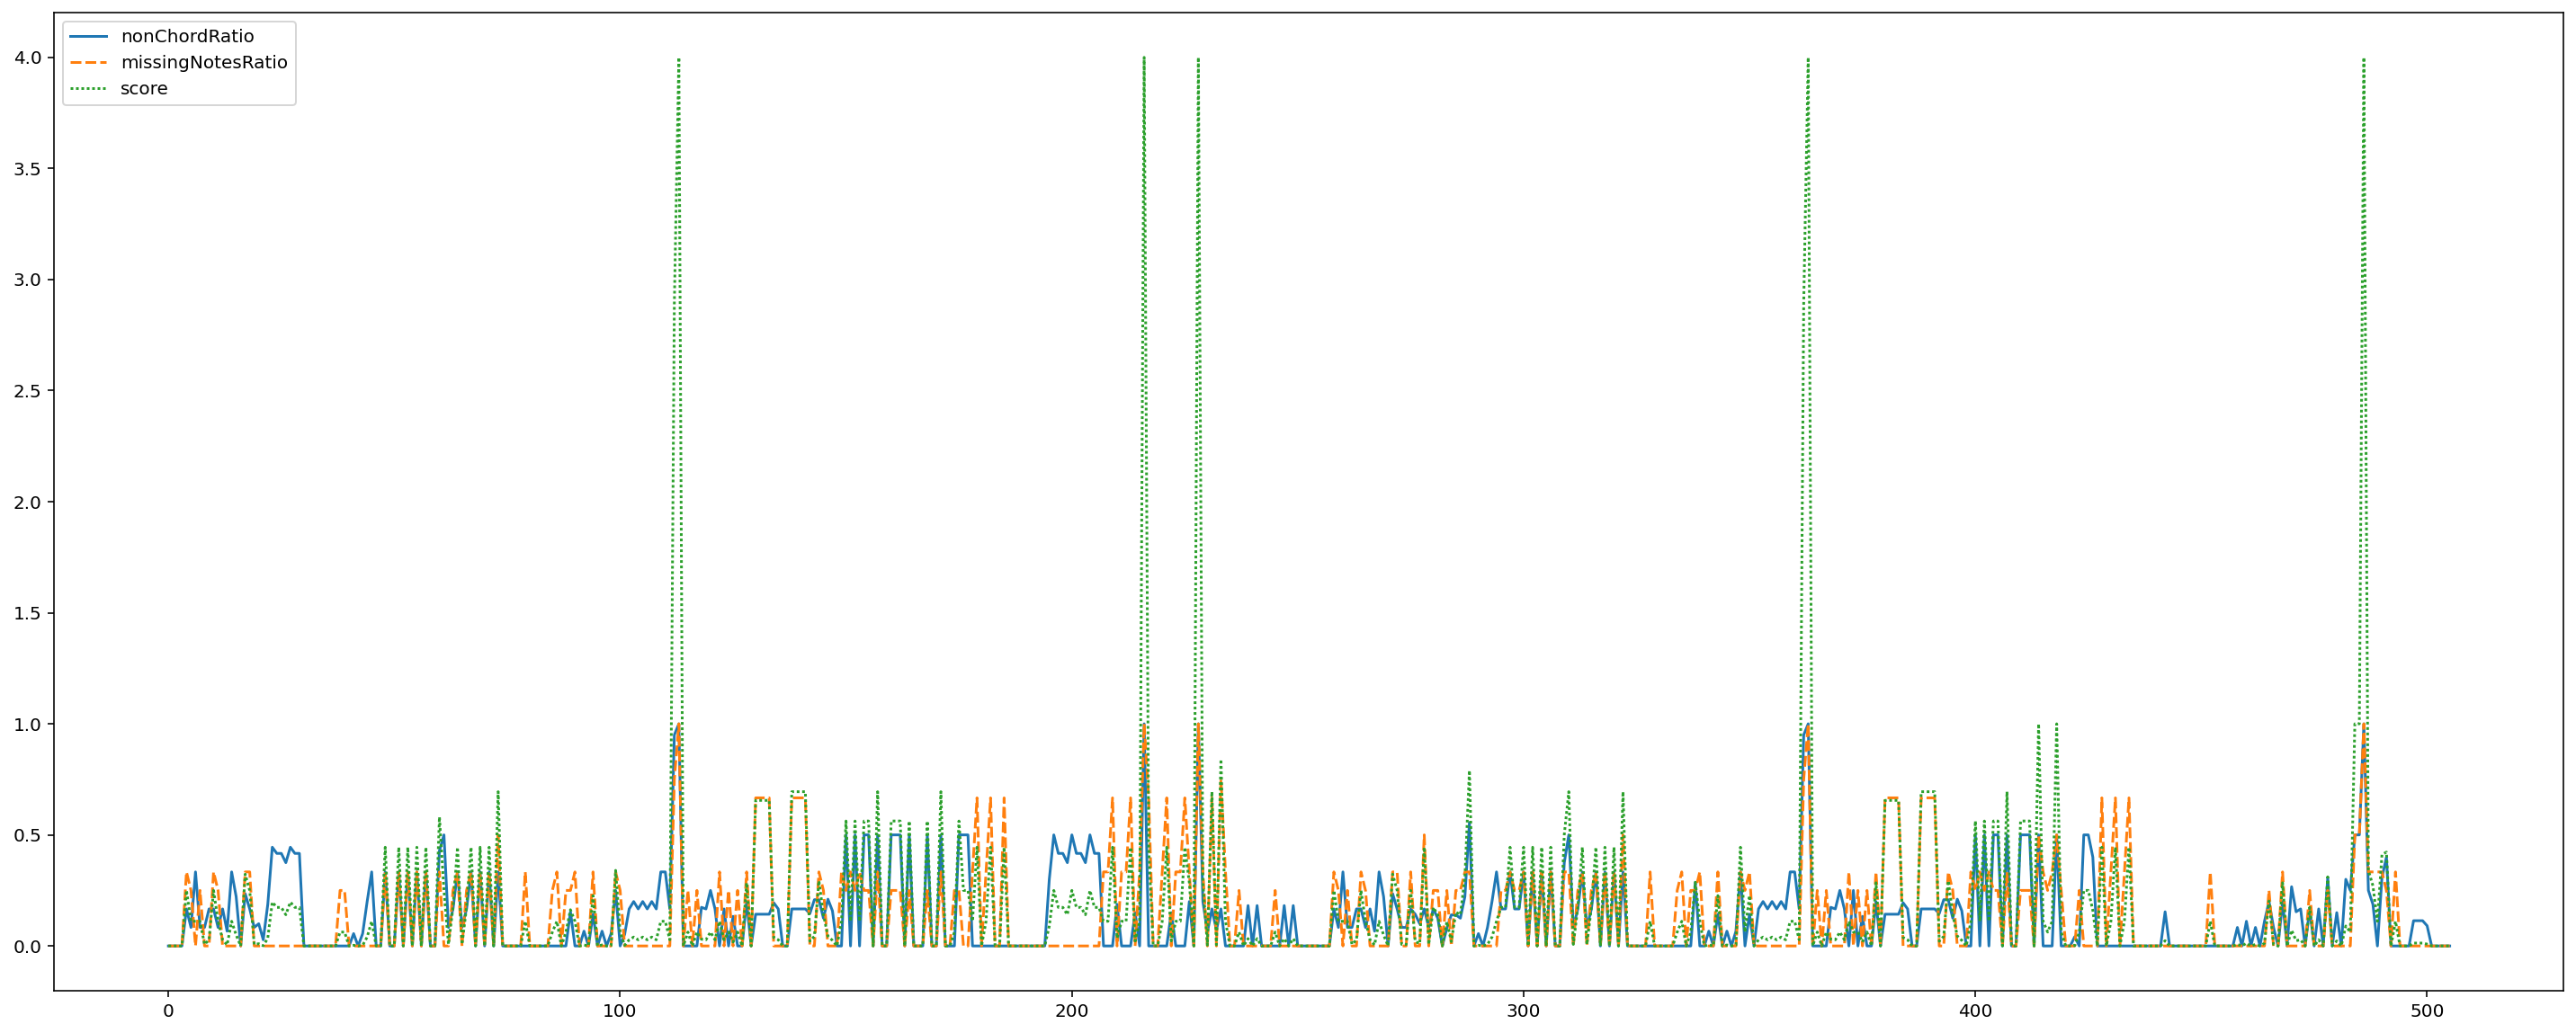

In [9]:
qualitydf["score"] = (qualitydf.nonChordRatio + qualitydf.missingNotesRatio)**2
print(qualitydf.nonChordRatio.sum(), qualitydf.missingNotesRatio.sum(), qualitydf.score.sum())
print("Top problematic annotations:")
display(qualitydf[qualitydf.score >= 1.0])
plt.figure(figsize=(25, 10))
sns.lineplot(data=qualitydf[["nonChordRatio", "missingNotesRatio", "score"]])

<AxesSubplot:xlabel='romanNumeral', ylabel='score'>

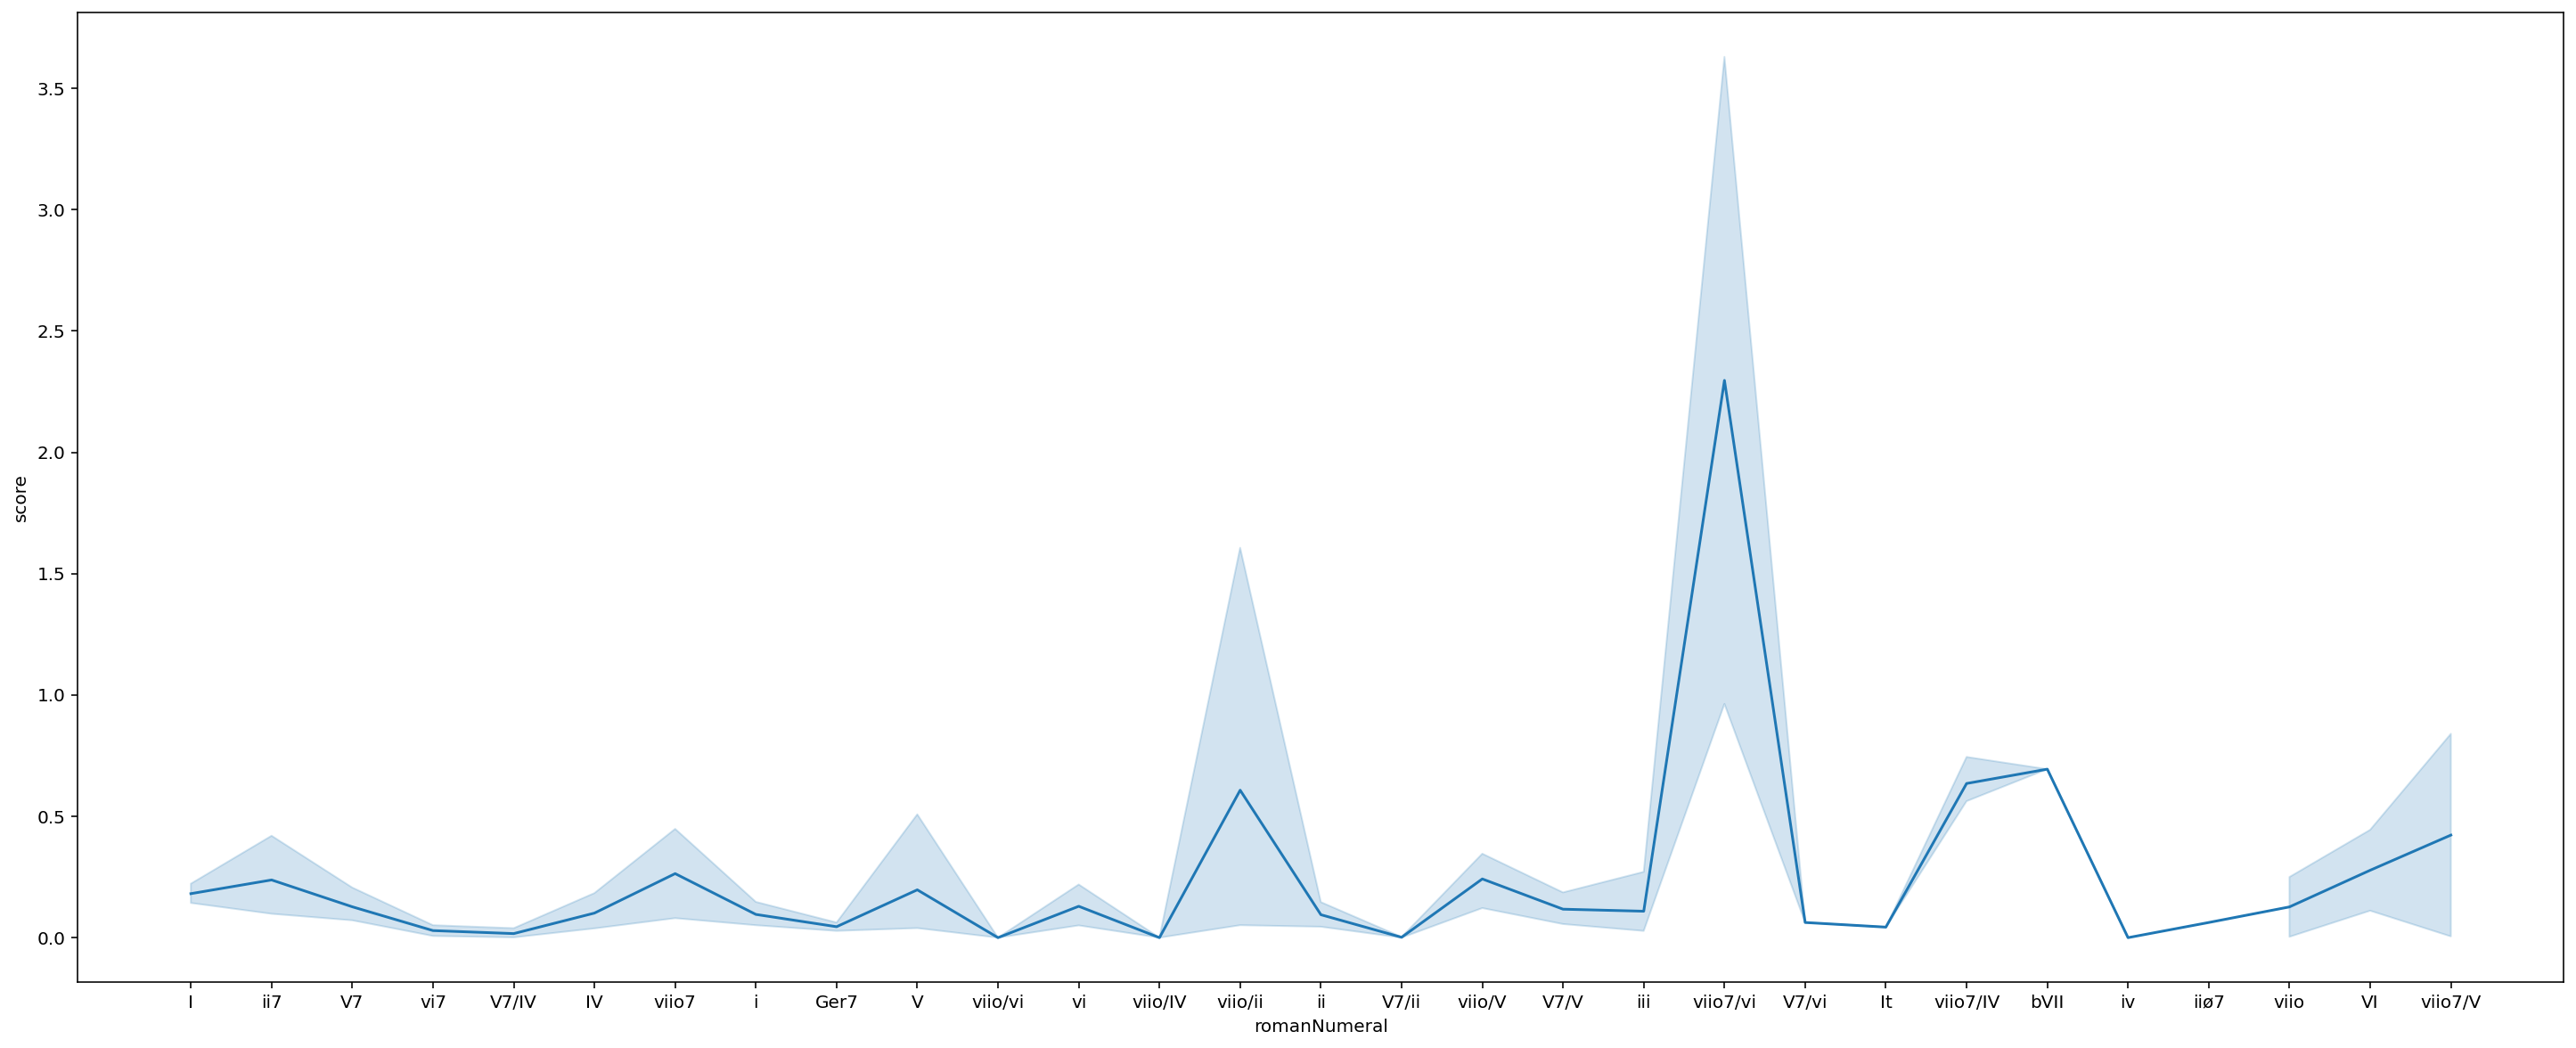

In [10]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=qualitydf, x="romanNumeral", y="score")